## Analysis Experiment 1 in "Risk optimization during ongoing movement: Insights from movement and gaze behavior in throwing"

---

Authors: Stephan Zahno, Damian Beck, Ralf Kredel, André Klostermann, & Ernst-Joachim Hossner

---

The notebook takes input data from 'data/data_exp1.xlsx' and analyzes:


1. participants' strategies (i.e. horizontal shifts) as a function of penalty (0 vs -500) x distance (30 vs 45 vs 60)  
    It generates bar plots, descriptive statistics and runs repeated measures ANOVAs to test interaction effects for the 3 variables:

    a. ball's impact location (Figure 3 right in paper)  
    b. final gaze fixation location (Figure 3 left in paper)  
    c. difference between the locations of the final gaze fixation and ball's impact

2. participants' strategies (i.e. horizontal shifts) vs. optimal horizontal shifts (predicted by the maximum expected gain model)  
    For that aim, it

   a. plots actual data vs. model predictions (Figure 4 in paper)  
   b. plots locations of final fixation vs. ball's impact vs. optimal aim point  in target space (Figure 5 in paper)  
   c. tests wether the difference between fixation-optimal is sig. larger than ball-optimal.

All plots are displayed in the Notebook and exported to the folder "figures".

---


To ensure that the code runs properly, consider activating our "VR_throwing" conda environment

In [ ]:
# Step 1: Create a new Conda environment using the provided environment.yml file
!conda env create -f ../environment.yml

# Step 2: Verify that the environment was created successfully
!conda env list

# Step 3: Check that the 'VR_throwing' environment is available
!conda info --envs

# Step 4: Activate the 'VR_throwing' environment

# NOTE: You cannot directly activate a Conda environment in a Jupyter Notebook.
# If you are NOT already running this notebook in the desired environment, follow these steps:
# 1. Install ipykernel in the 'VR_throwing' environment:
#    conda install -n VR_throwing ipykernel
# 2. Add the environment to Jupyter as a kernel:
#    python -m ipykernel install --user --name=VR_throwing --display-name "Python (VR_throwing)"
# 3. Restart this notebook and select the "Python (VR_throwing)" kernel from the Kernel menu.


---

## Analysis Script

### Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

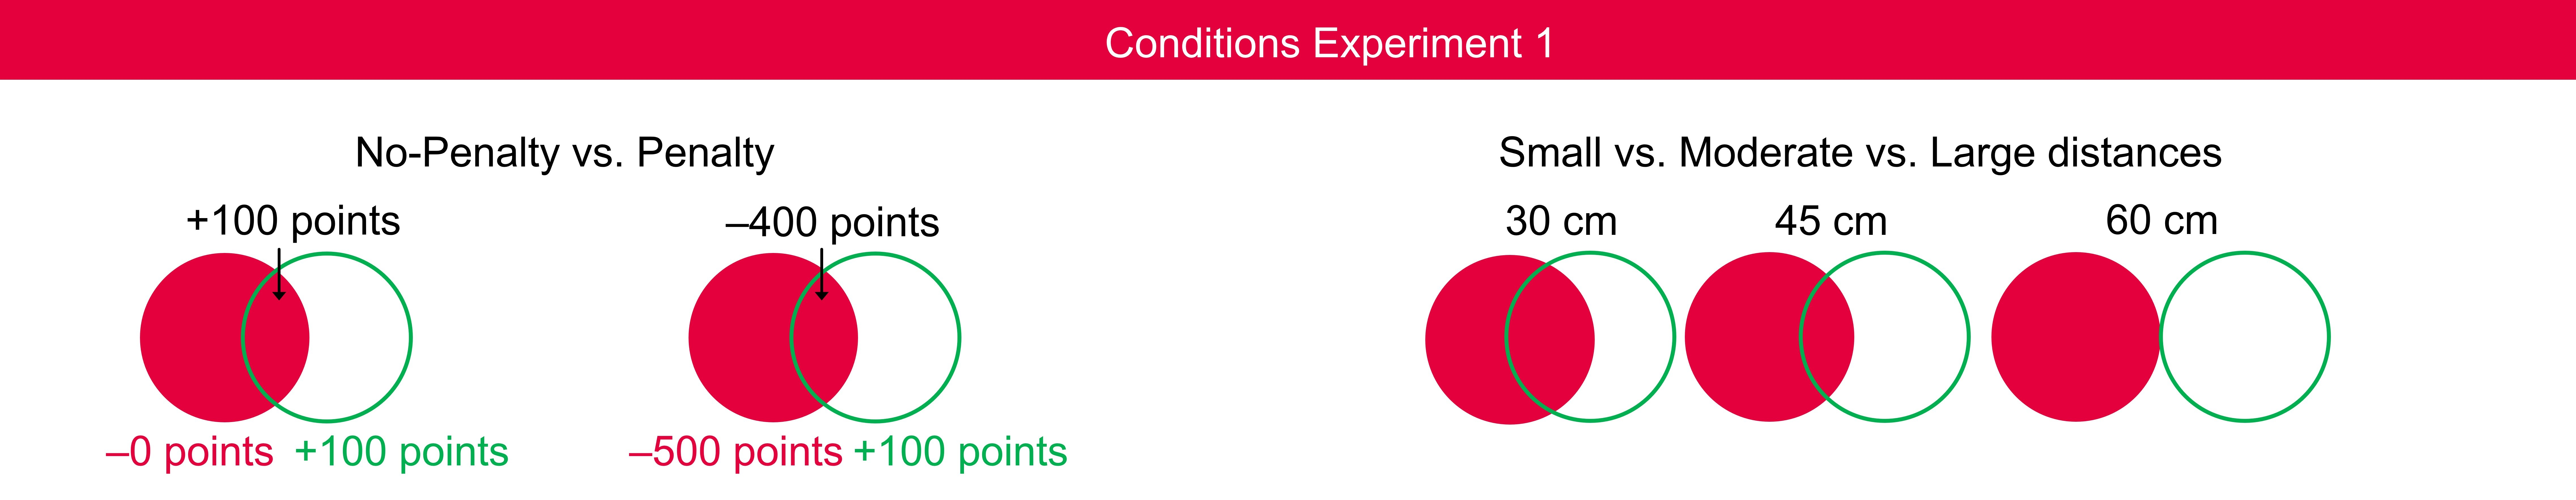

In [3]:
from IPython.display import display, Image
display(Image(filename=r'../figures/conditions_exp1.jpg'))

### Import Data

In [4]:
file_path = '../data/data_exp1.xlsx'
data = pd.read_excel(file_path)

### Aggregate Data for Analysis

In [5]:
aggregated_data_individual = data.groupby(['Vpn', 'Penalty_condition', 'Distance_condition']).agg({
    'Ball_impact_shift_x': ['mean'],
    'Ball_impact_y': ['mean'],
    'final_fixation_shift_x': ['mean'],
    'final_fixation_y': ['mean'],
    'diff_ball_fixation_shift_x': ['mean'],
    'optimal_shift_x': ['mean'], 
    'diff_fixation_optimal': ['mean'],
    'diff_ball_optimal': ['mean'],
}).reset_index()

aggregated_data_individual.columns = [
    'Vpn', 'Penalty_condition', 'Distance_condition',
    'Ball_impact_shift_x_mean',
    'Ball_impact_y_mean',
    'final_fixation_shift_x_mean',
    'final_fixation_y_mean',
    'diff_ball_fixation_shift_x_mean',
    'optimal_shift_x_mean',
    'diff_fixation_optimal_mean',
    'diff_ball_optimal_mean'
    ]

---

## 1. Participants' strategies (i.e. horizontal shifts) as a function of penalty (0 vs -500) x distance (60 vs 45 vs 30)   

## a. Ball's impact location

### Bar plot (figure 3 in paper) and descriptive stats

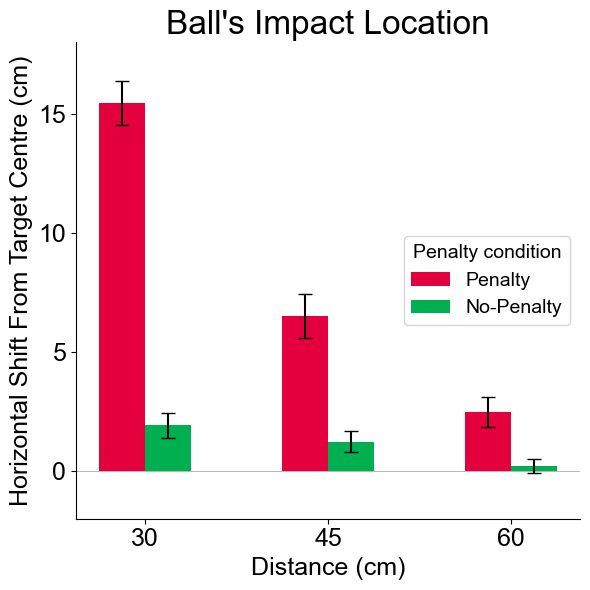

count       mean       std       min  \
Penalty_condition Distance_condition                                         
-500              30                   20.0  15.456701  4.064877  5.235443   
                  45                   20.0   6.501393  4.138382 -1.063667   
                  60                   20.0   2.494464  2.789929 -2.278814   
 0                30                   20.0   1.922055  2.304395 -1.123510   
                  45                   20.0   1.227536  1.975669 -1.712363   
                  60                   20.0   0.220497  1.331000 -2.867771   

                                            25%        50%        75%  \
Penalty_condition Distance_condition                                    
-500              30                  13.551037  16.291880  17.994028   
                  45                   3.516435   6.864015   9.795635   
                  60                   0.515066   2.012337   4.476070   
 0                30                  -0.155639   1.714551   3.300034   
                  45                  -0.098682   0.740868   2.908496   
                  60                  -0.505011   0.536152   0.885940   

                                            max  
Penalty_condition Distance_condition             
-500              30                  21.220114  
                  45                  12.346864  
                  60                   7.591017  
 0                30                   6.148587  
                  45                   5.203635  
                  60                   3.009196

In [6]:
# Font
plt.rcParams['font.family'] = 'Arial'

# Mean and standard error of Ball_impact_shift_x for each condition
grouped_data = aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition'])['Ball_impact_shift_x_mean'].agg(['mean', 'count', 'std']).reset_index()
# Standard error in grouped_data
grouped_data['SE'] = grouped_data['std'] / np.sqrt(grouped_data['count'])

# Get the unique levels of Distance_condition and Penalty_condition
distance_conditions = grouped_data['Distance_condition'].unique()
penalty_conditions = grouped_data['Penalty_condition'].unique()

# Plot aesthetics
bar_width = 0.25  
penalty_color = {0: '#00b050', -500: '#e4003c'}
legend_labels = {0: 'No-Penalty', -500: 'Penalty'}
plt.figure(figsize=(6,6))
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(y=0, color='grey', linewidth=0.4, zorder=1)

# Loop through each level of Distance_condition and Penalty_condition and plot the bars with error bars
for i, distance_condition in enumerate(distance_conditions):
    for j, penalty_condition in enumerate(penalty_conditions):
        # Get the mean and SE for the specific Distance_condition and Penalty_condition
        mean = grouped_data.loc[(grouped_data['Distance_condition'] == distance_condition) & 
                                (grouped_data['Penalty_condition'] == penalty_condition), 'mean'].values[0]
        se = grouped_data.loc[(grouped_data['Distance_condition'] == distance_condition) & 
                              (grouped_data['Penalty_condition'] == penalty_condition), 'SE'].values[0]
        # Position of the bar on the x-axis
        bar_position = i - bar_width/2 + j * bar_width
        # Plot the bar and the error bar
        plt.bar(bar_position, mean, width=bar_width, label=f'{legend_labels[penalty_condition]}' if i == 0 else "", 
                color=penalty_color[penalty_condition], yerr=se, capsize=5, zorder=3)
        
# Set the x-ticks, labels, title, and legend
plt.xticks(range(len(distance_conditions)), labels=distance_conditions)
plt.xlabel('Distance (cm)', fontsize=18)
plt.ylabel('Horizontal Shift From Target Centre (cm)', fontsize=18)
plt.title("Ball's Impact Location", fontsize=24)
plt.legend(fontsize=14, title='Penalty condition', title_fontsize=14, loc= 'center right')
plt.ylim(-2, 18)
plt.yticks(range(0, 19, 5), fontsize=18)
plt.xticks(range(len(distance_conditions)), labels=distance_conditions, fontsize=18)
plt.tight_layout()

# Export plot to folder "figures"
plt.savefig(f'../figures/ball_impact_exp1.png',dpi=300)
plt.show()

# Display descriptive statistics for Ball_impact_shift_x
aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition'])['Ball_impact_shift_x_mean'].describe()

### Inferential stats: Ball's impact location

#### 2 (Penalty: penalty vs. no-penalty) x 3 (Distance: 30 vs. 45 vs. 60) ANOVA with repeated measures
#### Testing interaction effect

In [7]:
# ANOVA using Pingouin package 

# Check assumptions
# Check normality
for (penalty, condition), group in aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition']):
    # Perform normality test on 'Ball_impact_shift_x_mean'
    normality = pg.normality(group['Ball_impact_shift_x_mean'], method='shapiro', alpha=0.05)
    print(f"Penalty Condition: {penalty}, Distance Condition: {condition}")
    print(normality)

# Check sphericity
sphercity = pg.sphericity(aggregated_data_individual, dv='Ball_impact_shift_x_mean', within=['Penalty_condition', 'Distance_condition'], method= 'mauchly', subject='Vpn')
print(sphercity)

# Perform repeated measures ANOVA
# Reporting F and p-value and partial eta square
anova_ball_impact = pg.rm_anova(data=aggregated_data_individual, dv='Ball_impact_shift_x_mean', within=['Penalty_condition', 'Distance_condition'], subject='Vpn', effsize="np2")
print(anova_ball_impact)

# Perform post-hoc tests
posthoc_ball_impact = pg.pairwise_tests(data=aggregated_data_individual, dv='Ball_impact_shift_x_mean', within=['Penalty_condition', 'Distance_condition'], subject='Vpn', padjust='bonf', effsize="cohen").round(3)
posthoc_ball_impact

Penalty Condition: -500, Distance Condition: 30
                                 W      pval  normal
Ball_impact_shift_x_mean  0.945664  0.306022    True
Penalty Condition: -500, Distance Condition: 45
                                 W      pval  normal
Ball_impact_shift_x_mean  0.951205  0.385746    True
Penalty Condition: -500, Distance Condition: 60
                                 W      pval  normal
Ball_impact_shift_x_mean  0.969854  0.751791    True
Penalty Condition: 0, Distance Condition: 30
                                 W      pval  normal
Ball_impact_shift_x_mean  0.927895  0.140657    True
Penalty Condition: 0, Distance Condition: 45
                                 W      pval  normal
Ball_impact_shift_x_mean  0.950524  0.375119    True
Penalty Condition: 0, Distance Condition: 60
                                 W      pval  normal
Ball_impact_shift_x_mean  0.973194  0.820379    True
SpherResults(spher=True, W=0.869136257272937, chi2=2.5245966280643346, dof=2, pval=0.

c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrameG

,Contrast,Penalty_condition,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,Penalty_condition,-,-500,0,True,True,9.522,19.0,two-sided,0.000,NaN,NaN,1.1e+06,2.846
1,Distance_condition,-,30,45,True,True,9.829,19.0,two-sided,0.000,0.000,bonf,1.76e+06,1.952
2,Distance_condition,-,30,60,True,True,12.943,19.0,two-sided,0.000,0.000,bonf,1.257e+08,3.469
3,Distance_condition,-,45,60,True,True,6.554,19.0,two-sided,0.000,0.000,bonf,6946.937,1.213
4,Penalty_condition * Distance_condition,-500,30,45,True,True,17.409,19.0,two-sided,0.000,0.000,bonf,1.674e+10,2.183
5,Penalty_condition * Distance_condition,-500,30,60,True,True,17.453,19.0,two-sided,0.000,0.000,bonf,1.748e+10,3.718
6,Penalty_condition * Distance_condition,-500,45,60,True,True,6.578,19.0,two-sided,0.000,0.000,bonf,7260.678,1.135
7,Penalty_condition * Distance_condition,0,30,45,True,True,1.040,19.0,two-sided,0.311,1.000,bonf,0.374,0.324
8,Penalty_condition * Distance_condition,0,30,60,True,True,2.716,19.0,two-sided,0.014,0.082,bonf,3.941,0.904
9,Penalty_condition * Distance_condition,0,45,60,True,True,1.706,19.0,two-sided,0.104,0.626,bonf,0.793,0.598


---

## b. Final gaze fixation location

### Bar plot (Figure 3 in paper) and descriptive stats


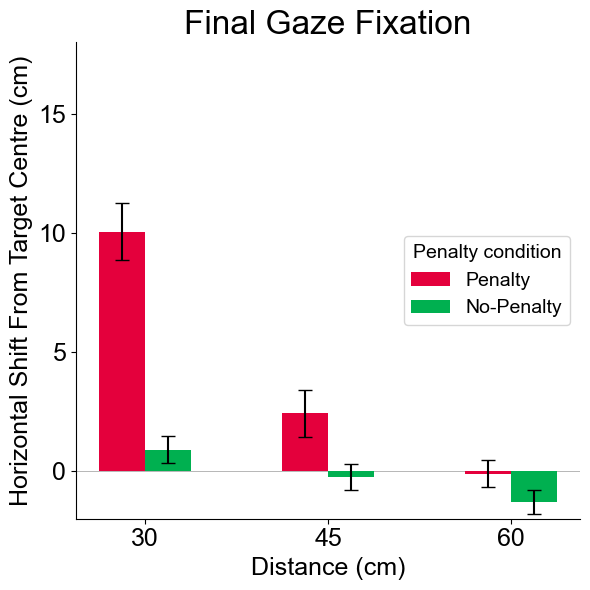

count       mean       std       min  \
Penalty_condition Distance_condition                                         
-500              30                   20.0  10.057972  5.420255 -0.995086   
                  45                   20.0   2.420424  4.357265 -5.442147   
                  60                   20.0  -0.101916  2.618429 -6.423412   
 0                30                   20.0   0.894929  2.517078 -4.479024   
                  45                   20.0  -0.250549  2.418968 -5.456179   
                  60                   20.0  -1.301141  2.210893 -6.325804   

                                           25%        50%        75%  \
Penalty_condition Distance_condition                                   
-500              30                  7.344967  10.852634  14.781296   
                  45                 -0.811750   2.439261   5.852463   
                  60                 -0.604908  -0.010933   1.304371   
 0                30                 -0.374200   1.333202   2.671606   
                  45                 -1.324293   0.091314   1.254553   
                  60                 -2.167246  -0.788692   0.136619   

                                            max  
Penalty_condition Distance_condition             
-500              30                  17.115895  
                  45                   9.807967  
                  60                   3.852541  
 0                30                   4.702852  
                  45                   4.603018  
                  60                   1.577235

In [8]:
# Font
plt.rcParams['font.family'] = 'Arial'

# Mean and standard error of final_fixation_shift_x_mean for each condition
grouped_data = aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition'])['final_fixation_shift_x_mean'].agg(['mean', 'count', 'std']).reset_index()
grouped_data['SE'] = grouped_data['std'] / np.sqrt(grouped_data['count'])

# Get the unique levels of Distance_condition and Penalty_condition
distance_conditions = grouped_data['Distance_condition'].unique()
penalty_conditions = grouped_data['Penalty_condition'].unique()

# Plot aesthetics
bar_width = 0.25  
penalty_color = {0: '#00b050', -500: '#e4003c'}
legend_labels = {0: 'No-Penalty', -500: 'Penalty'}
plt.figure(figsize=(6,6))
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(y=0, color='grey', linewidth=0.4, zorder=1)

# Loop through each level of Distance_condition and Penalty_condition and plot the bars with error bars
for i, distance_condition in enumerate(distance_conditions):
    for j, penalty_condition in enumerate(penalty_conditions):
        # Get the mean and SE for the specific Distance_condition and Penalty_condition
        mean = grouped_data.loc[(grouped_data['Distance_condition'] == distance_condition) & 
                                (grouped_data['Penalty_condition'] == penalty_condition), 'mean'].values[0]
        se = grouped_data.loc[(grouped_data['Distance_condition'] == distance_condition) & 
                              (grouped_data['Penalty_condition'] == penalty_condition), 'SE'].values[0]
        # position of the bar on the x-axis
        bar_position = i - bar_width/2 + j * bar_width
        # Plot the bar and the error bar with the updated legend labels
        plt.bar(bar_position, mean, width=bar_width, label=f'{legend_labels[penalty_condition]}' if i == 0 else "", 
                color=penalty_color[penalty_condition], yerr=se, capsize=5, zorder=3)
        
# Set the x-ticks, labels, title, and legend
plt.xticks(range(len(distance_conditions)), labels=distance_conditions)
plt.xlabel('Distance (cm)', fontsize=18)
plt.ylabel('Horizontal Shift From Target Centre (cm)', fontsize=18)
plt.title("Final Gaze Fixation", fontsize=24)
plt.legend(fontsize=14, title='Penalty condition', title_fontsize=14, loc= 'center right')
plt.ylim(-2, 18)
plt.yticks(range(0, 19, 5), fontsize=18)
plt.xticks(range(len(distance_conditions)), labels=distance_conditions, fontsize=18)
plt.tight_layout()

# Export plot to folder "figures"
plt.savefig(f'../figures/final_fixation_exp1.png',dpi=300)
plt.show()

# Display descriptive statistics for final_fixation_shift_x_mean
aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition'])['final_fixation_shift_x_mean'].describe()

### Inferential stats: Final gaze fixation location

####  2 (Penalty: penalty vs. no-penalty) x 3 (Distance: 30 vs. 45 vs. 60) ANOVA with repeated measures
#### Testing interaction effect

In [9]:
# ANOVA using Pingouin package 

# Check assumptions
# Check normality
for (penalty, condition), group in aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition']):
    # Perform normality test on 'final_fixation_shift_x_mean'
    normality = pg.normality(group['final_fixation_shift_x_mean'], method='shapiro', alpha=0.05)
    print(f"Penalty Condition: {penalty}, Distance Condition: {condition}")
    print(normality)

# Check sphericity
sphercity = pg.sphericity(aggregated_data_individual, dv='final_fixation_shift_x_mean', within=['Penalty_condition', 'Distance_condition'], method= 'mauchly', subject='Vpn')
print(sphercity)

# Perform repeated measures ANOVA
# Reporting F and p-value and partial eta square
anova_final_fixation = pg.rm_anova(data=aggregated_data_individual, dv='final_fixation_shift_x_mean', within=['Penalty_condition', 'Distance_condition'], subject='Vpn', effsize="np2")
print(anova_final_fixation)

# Perform post-hoc tests
posthoc_final_fixation = pg.pairwise_tests(data=aggregated_data_individual, dv='final_fixation_shift_x_mean', within=['Penalty_condition', 'Distance_condition'], subject='Vpn', padjust='bonf', effsize="cohen").round(3)
posthoc_final_fixation

Penalty Condition: -500, Distance Condition: 30
                                    W      pval  normal
final_fixation_shift_x_mean  0.931626  0.165947    True
Penalty Condition: -500, Distance Condition: 45
                                    W      pval  normal
final_fixation_shift_x_mean  0.974205  0.839942    True
Penalty Condition: -500, Distance Condition: 60
                                    W      pval  normal
final_fixation_shift_x_mean  0.927526  0.138369    True
Penalty Condition: 0, Distance Condition: 30
                                    W      pval  normal
final_fixation_shift_x_mean  0.947738  0.334048    True
Penalty Condition: 0, Distance Condition: 45
                                    W      pval  normal
final_fixation_shift_x_mean  0.961483  0.573882    True
Penalty Condition: 0, Distance Condition: 60
                                    W      pval  normal
final_fixation_shift_x_mean  0.903635  0.048269   False
SpherResults(spher=False, W=0.6111457307390211, c

c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrameG

,Contrast,Penalty_condition,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,Penalty_condition,-,-500,0,True,True,7.402,19.0,two-sided,0.000,NaN,NaN,3.256e+04,1.442
1,Distance_condition,-,30,45,True,True,8.934,19.0,two-sided,0.000,0.000,bonf,4.352e+05,1.341
2,Distance_condition,-,30,60,True,True,11.269,19.0,two-sided,0.000,0.000,bonf,1.408e+07,2.145
3,Distance_condition,-,45,60,True,True,4.317,19.0,two-sided,0.000,0.001,bonf,86.94,0.639
4,Penalty_condition * Distance_condition,-500,30,45,True,True,8.772,19.0,two-sided,0.000,0.000,bonf,3.349e+05,1.553
5,Penalty_condition * Distance_condition,-500,30,60,True,True,10.174,19.0,two-sided,0.000,0.000,bonf,2.946e+06,2.387
6,Penalty_condition * Distance_condition,-500,45,60,True,True,4.028,19.0,two-sided,0.001,0.004,bonf,48.793,0.702
7,Penalty_condition * Distance_condition,0,30,45,True,True,2.722,19.0,two-sided,0.014,0.081,bonf,3.986,0.464
8,Penalty_condition * Distance_condition,0,30,60,True,True,4.646,19.0,two-sided,0.000,0.001,bonf,168.069,0.927
9,Penalty_condition * Distance_condition,0,45,60,True,True,2.964,19.0,two-sided,0.008,0.048,bonf,6.192,0.453


---

## c. Difference of final gaze fixation location vs. ball location

### Bar plot and descriptive stats

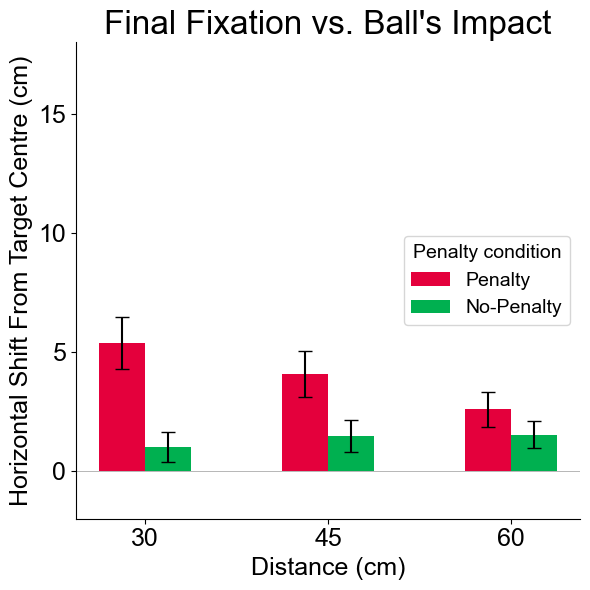

count      mean       std       min  \
Penalty_condition Distance_condition                                        
-500              30                   20.0  5.398729  4.882056 -0.536216   
                  45                   20.0  4.080969  4.310726 -3.506586   
                  60                   20.0  2.596380  3.281686 -2.606009   
 0                30                   20.0  1.027126  2.823123 -4.282920   
                  45                   20.0  1.478084  3.026503 -3.261037   
                  60                   20.0  1.521638  2.536118 -3.374115   

                                           25%       50%       75%        max  
Penalty_condition Distance_condition                                           
-500              30                  1.099791  4.544258  8.148305  16.682733  
                  45                  0.019864  4.412809  7.691066  10.368368  
                  60                  0.436546  2.141516  4.572797  10.681601  
 0                30                 -1.043522  0.321283  3.119824   5.747286  
                  45                 -0.116484  1.164253  3.427014   8.743378  
                  60                 -0.105001  1.189371  2.979225   6.319431

In [10]:
# Font
plt.rcParams['font.family'] = 'Arial'

# Mean and standard error of 'diff_ball_fixation_shift_x_mean' for each condition
grouped_data = aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition'])['diff_ball_fixation_shift_x_mean'].agg(['mean', 'count', 'std']).reset_index()
# Standard error in grouped_data
grouped_data['SE'] = grouped_data['std'] / np.sqrt(grouped_data['count'])

# Get the unique levels of Distance_condition and Penalty_condition
distance_conditions = grouped_data['Distance_condition'].unique()
penalty_conditions = grouped_data['Penalty_condition'].unique()

# Plot aesthetics
bar_width = 0.25  
penalty_color = {0: '#00b050', -500: '#e4003c'}
legend_labels = {0: 'No-Penalty', -500: 'Penalty'}
plt.figure(figsize=(6,6))
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(y=0, color='grey', linewidth=0.4, zorder=1)

# Loop through each level of Distance_condition and Penalty_condition and plot the bars with error bars
for i, distance_condition in enumerate(distance_conditions):
    for j, penalty_condition in enumerate(penalty_conditions):
        # Get the mean and SE for the specific Distance_condition and Penalty_condition
        mean = grouped_data.loc[(grouped_data['Distance_condition'] == distance_condition) & 
                                (grouped_data['Penalty_condition'] == penalty_condition), 'mean'].values[0]
        se = grouped_data.loc[(grouped_data['Distance_condition'] == distance_condition) & 
                              (grouped_data['Penalty_condition'] == penalty_condition), 'SE'].values[0]
        # Position of the bar on the x-axis
        bar_position = i - bar_width/2 + j * bar_width
        # Plot the bar and the error bar with the updated legend labels
        plt.bar(bar_position, mean, width=bar_width, label=f'{legend_labels[penalty_condition]}' if i == 0 else "", 
                color=penalty_color[penalty_condition], yerr=se, capsize=5, zorder=3)
        
# Set the x-ticks, labels, title, and legend
plt.xticks(range(len(distance_conditions)), labels=distance_conditions)
plt.xlabel('Distance (cm)', fontsize=18)
plt.ylabel('Horizontal Shift From Target Centre (cm)', fontsize=18)
plt.title("Final Fixation vs. Ball's Impact", fontsize=24)
plt.legend(fontsize=14, title='Penalty condition', title_fontsize=14, loc= 'center right')
plt.ylim(-2, 18)
plt.yticks(range(0, 19, 5), fontsize=18)
plt.xticks(range(len(distance_conditions)), labels=distance_conditions, fontsize=18)

# Show the plot
plt.tight_layout()
# Export plot to folder "figures"
plt.savefig(f'../figures/diff_fixation_ball_exp1.png',dpi=300)
plt.show()

# Display descriptive statistics for diff_ball_fixation_shift_x_mean
aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition'])['diff_ball_fixation_shift_x_mean'].describe()

## Inferential stats: Final fixation vs. Ball

####  2 (Penalty: penalty vs. no-penalty) x 3 (Distance: 30 vs. 45 vs. 60) ANOVA with repeated measures
#### Testing interaction effect

In [11]:
# ANOVA using Pingouin package 

# Check assumptions
# Check normality
for (penalty, condition), group in aggregated_data_individual.groupby(['Penalty_condition', 'Distance_condition']):
    # Perform normality test on 'diff_ball_fixation_shift_x_mean'
    normality = pg.normality(group['diff_ball_fixation_shift_x_mean'], method='shapiro', alpha=0.05)
    print(f"Penalty Condition: {penalty}, Distance Condition: {condition}")
    print(normality)

# Check sphericity
sphercity = pg.sphericity(aggregated_data_individual, dv='diff_ball_fixation_shift_x_mean', within=['Penalty_condition', 'Distance_condition'], method= 'mauchly', subject='Vpn')
print(sphercity)

# Perform repeated measures ANOVA
# Reporting F and p-value and partial eta square

anova_diff_fixation_ball = pg.rm_anova(data=aggregated_data_individual, dv='diff_ball_fixation_shift_x_mean', within=['Penalty_condition', 'Distance_condition'], subject='Vpn', effsize="np2")
print(anova_diff_fixation_ball)

# Perform post-hoc tests
posthoc_diff_fixation_ball = pg.pairwise_tests(data=aggregated_data_individual, dv='diff_ball_fixation_shift_x_mean', within=['Distance_condition', 'Penalty_condition'], subject='Vpn', padjust='bonf', effsize="cohen").round(3)
posthoc_diff_fixation_ball

Penalty Condition: -500, Distance Condition: 30
                                        W      pval  normal
diff_ball_fixation_shift_x_mean  0.921055  0.103827    True
Penalty Condition: -500, Distance Condition: 45
                                        W      pval  normal
diff_ball_fixation_shift_x_mean  0.949372  0.357652    True
Penalty Condition: -500, Distance Condition: 60
                                        W      pval  normal
diff_ball_fixation_shift_x_mean  0.964848  0.644508    True
Penalty Condition: 0, Distance Condition: 30
                                        W      pval  normal
diff_ball_fixation_shift_x_mean  0.949428  0.358498    True
Penalty Condition: 0, Distance Condition: 45
                                        W      pval  normal
diff_ball_fixation_shift_x_mean  0.961156  0.567185    True
Penalty Condition: 0, Distance Condition: 60
                                        W      pval  normal
diff_ball_fixation_shift_x_mean  0.979827  0.931851    True
S

c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\zahno\AppData\Local\anaconda3\envs\VR_throwing\lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrameG

,Contrast,Distance_condition,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,Distance_condition,-,30,45,True,True,0.788,19.0,two-sided,0.440,1.000,bonf,0.307,0.140
1,Distance_condition,-,30,60,True,True,1.710,19.0,two-sided,0.104,0.311,bonf,0.798,0.416
2,Distance_condition,-,45,60,True,True,1.363,19.0,two-sided,0.189,0.566,bonf,0.519,0.251
3,Penalty_condition,-,-500,0,True,True,3.993,19.0,two-sided,0.001,NaN,NaN,45.481,0.923
4,Distance_condition * Penalty_condition,30,-500,0,True,True,3.731,19.0,two-sided,0.001,0.004,bonf,27.036,1.096
5,Distance_condition * Penalty_condition,45,-500,0,True,True,2.983,19.0,two-sided,0.008,0.023,bonf,6.412,0.699
6,Distance_condition * Penalty_condition,60,-500,0,True,True,1.607,19.0,two-sided,0.124,0.373,bonf,0.697,0.366


---

## 2. Participants' strategies (i.e. horizontal shift) vs. optimal horizontal shift (predicted by expected gain model)

## a. Plot data vs. model (Figure 4 in paper) 

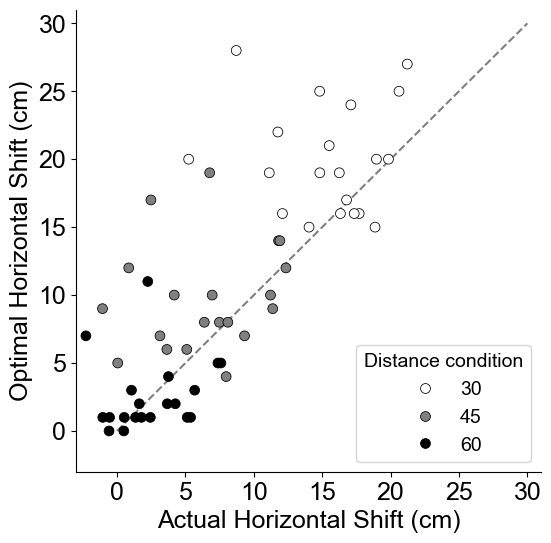

In [12]:
import seaborn as sns

# Font
plt.rcParams['font.family'] = 'Arial'

# Select data with penalty condition -500
data_penalty = aggregated_data_individual[aggregated_data_individual['Penalty_condition'] == -500]

# Define a custom palette for white, black, and grey
custom_palette = {30: 'white', 45: 'grey', 60: 'black'}

# Plot
plt.figure(figsize=(6, 6))
# plot bisection line 
plt.plot([0, 30], [0, 30], linestyle='--', color='grey', zorder=1)
# plot actual vs. optimal shifts
sns.scatterplot(
    x='Ball_impact_shift_x_mean', 
    y='optimal_shift_x_mean', 
    hue='Distance_condition', 
    data=data_penalty, 
    palette=custom_palette, 
    s=50, alpha=1,
    edgecolor='black'
)

# Plot aesthetics
plt.xlabel('Actual Horizontal Shift (cm)', fontsize=18)
plt.ylabel('Optimal Horizontal Shift (cm)', fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.grid(False)
plt.xlim(-3, 31)
plt.ylim(-3, 31)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(fontsize = 14, title='Distance condition', title_fontsize=14, loc= 'lower right')

# Export plot to folder "figures"
plt.savefig(f'../figures/data_vs_model_exp1.png',dpi=300)
plt.show()


## b. Plot final fixation location vs. ball's impact location vs. optimal aim point location in target space (Figure 5 in paper)  

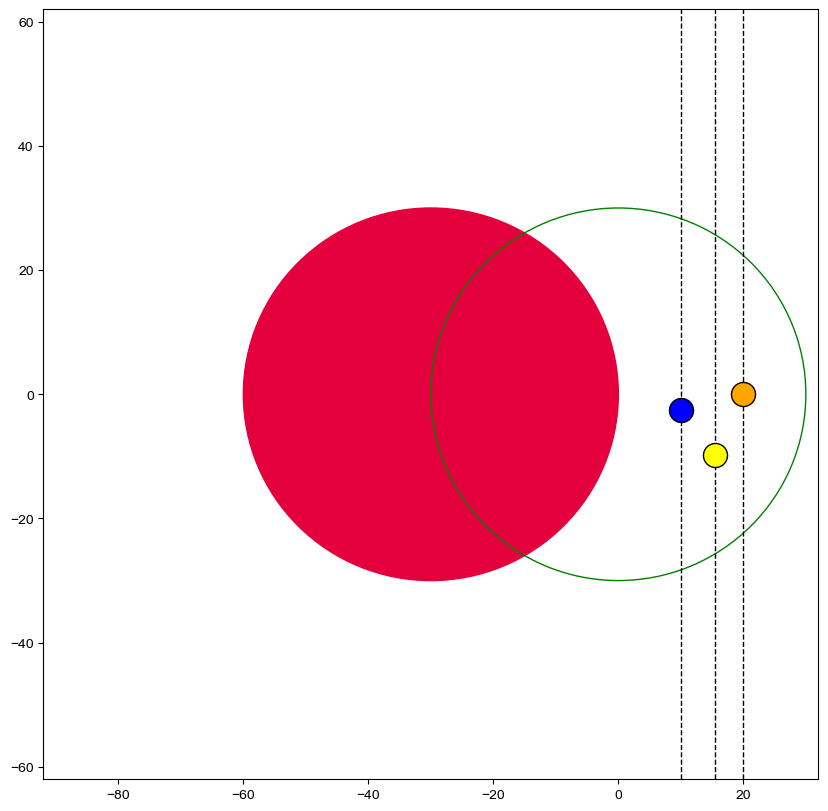

In [13]:

#### Select condition for plot
data_plot_targetspace = aggregated_data_individual[(aggregated_data_individual['Penalty_condition'] == -500) & (aggregated_data_individual['Distance_condition'] == 30)]
####

#Font
plt.figure(figsize=(10,10))

# Mean of final_fixation_shift_x_mean and final_fixation_y_mean
mean_final_fixation_shift_x = np.mean(data_plot_targetspace['final_fixation_shift_x_mean'])
mean_final_fixation_y = np.mean(data_plot_targetspace['final_fixation_y_mean'])

# Mean of Ball_impact_shift_x_mean and Ball_impact_shift_x_mean
mean_Ball_impact_shift_x = np.mean(data_plot_targetspace['Ball_impact_shift_x_mean'])
mean_Ball_impact_y = np.mean(data_plot_targetspace['Ball_impact_y_mean'])

# Mean of optimal_shift_x_mean
optimal_shift_x = np.mean(data_plot_targetspace['optimal_shift_x_mean'])
optimal_shift_y = 0

# Get distance condition to set the position of the red target circle
distance_condition = (data_plot_targetspace['Distance_condition'].iloc[0])
penalty_condition = (data_plot_targetspace['Penalty_condition'].iloc[0])

# Filled red circle with center with radius 30
red_circle = plt.Circle((distance_condition*-1, 0), 30, fill=True, color='#e4003c')
plt.gca().add_patch(red_circle)

# Green circle with center at (0,0) and radius 30
green_circle = plt.Circle((0, 0), 30, fill=False, color='green', linestyle='solid')
plt.gca().add_patch(green_circle)

# Vertical line to the mean point of Ball_impact_shift_x
plt.axvline(x=mean_Ball_impact_shift_x, color='black', linestyle='--', linewidth=1, zorder=1)
# Mean point of Ball_impact_shift_x and mean_Ball_impact_y as a yellow dot
plt.scatter(mean_Ball_impact_shift_x, mean_Ball_impact_y, c='yellow', alpha=1, marker='o', edgecolors='black', s=300, zorder=2)

# Vertical line to the mean point of final_fixation_shift_x
plt.axvline(x=mean_final_fixation_shift_x, color='black', linestyle='--', linewidth=1, zorder=1)
# Mean point of final_fixation_shift_x and final_fixation_y as a blue dot
plt.scatter(mean_final_fixation_shift_x, mean_final_fixation_y, c='blue', alpha=1, marker='o', edgecolors='black', s=300, zorder=2)

# Vertical line to the mean point of optimal aimpoint
plt.axvline(x=optimal_shift_x, color='black', linestyle='--', linewidth=1, zorder=1)
# Plot the mean point of optimal aimpoint as a red dot 
plt.scatter(optimal_shift_x, optimal_shift_y, c='orange', alpha=1, marker='o', edgecolors='black', s=300, zorder=2)

# Set the x and y limits
plt.xlim(-92, 32)
plt.ylim(-62, 62)

# Export plot to folder "figures"
plt.savefig(f'../figures/target_space{distance_condition}_{penalty_condition}.png',dpi=300)
plt.show()


## c. Test wether the difference between fixation-optimal is sig. larger than ball-optimal

- in penalty -500 / distance 30
- in penalty -500 / distance 45

In [14]:
# Filter data for penalty condition -500 and distance condition 30
data_penalty_30 = aggregated_data_individual[(aggregated_data_individual['Penalty_condition'] == -500) & (aggregated_data_individual['Distance_condition'] == 30)]
# Filter data for penalty condition -500 and distance condition 45
data_penalty_45 = aggregated_data_individual[(aggregated_data_individual['Penalty_condition'] == -500) & (aggregated_data_individual['Distance_condition'] == 45)]

### Run paired t-tests 
- Two-sided
- Bonferroni correction (as two t-tests were performed)

### Condition: Penalty -500, Distance 30

In [15]:
# Run paired t-test and calculate Cohen's d
# Check assumptions

data_penalty_30 = data_penalty_30.assign(differences_30 = data_penalty_30.loc[:, 'diff_fixation_optimal_mean'] - data_penalty_30.loc[:, 'diff_ball_optimal_mean'])
normality = pg.normality(data_penalty_30["differences_30"], method='shapiro', alpha=0.05)
print(normality) # Normality is violated, we will check with Wilcoxon signed-rank test

ttest_results_30 = pg.ttest(data_penalty_30['diff_fixation_optimal_mean'], data_penalty_30['diff_ball_optimal_mean'], paired=True)
print(ttest_results_30)

wilcoxon_results_30 = pg.wilcoxon(data_penalty_30['diff_fixation_optimal_mean'], data_penalty_30['diff_ball_optimal_mean'], alternative='two-sided')
print(wilcoxon_results_30) # No difference in interpretation

# Apply Bonferroni correction
bonferroni_p_value = ttest_results_30.iloc[0]['p-val'] * 2

bonferroni_p_value = min(bonferroni_p_value, 1)

print("\nP-value after Bonferroni correction:")
print(bonferroni_p_value)

                       W      pval  normal
differences_30  0.881829  0.019088   False
               T  dof alternative     p-val         CI95%   cohen-d    BF10  \
T-test  3.359427   19   two-sided  0.003293  [1.11, 4.76]  0.808678  13.085   

           power  
T-test  0.929012  
          W-val alternative     p-val       RBC  CLES
Wilcoxon   24.0   two-sided  0.001432  0.771429  0.75

P-value after Bonferroni correction:
0.00658599851405329


### Condition: Penalty -500, Distance 45

In [16]:
# Run paired t-test and calculate Cohen's d
# Check assumptions
data_penalty_45 = data_penalty_45.assign(differences_45 = data_penalty_45.loc[:, 'diff_fixation_optimal_mean'] - data_penalty_45.loc[:, 'diff_ball_optimal_mean'])
normality = pg.normality(data_penalty_45["differences_45"], method='shapiro', alpha=0.05)
print(normality) # Normality is violated, we will check with Wilcoxon signed-rank test

ttest_results_45 = pg.ttest(data_penalty_45['diff_fixation_optimal_mean'], data_penalty_45['diff_ball_optimal_mean'], paired=True)
print(ttest_results_45)

wilcoxon_results_45 = pg.wilcoxon(data_penalty_45['diff_fixation_optimal_mean'], data_penalty_45['diff_ball_optimal_mean'], alternative='two-sided')
print(wilcoxon_results_45) # No difference in interpretation

# Apply Bonferroni correction
bonferroni_p_value = ttest_results_45.iloc[0]['p-val'] * 2
bonferroni_p_value = min(bonferroni_p_value, 1)

print("\nP-value after Bonferroni correction:")
print(bonferroni_p_value)

                       W      pval  normal
differences_45  0.912496  0.071125    True
               T  dof alternative     p-val         CI95%   cohen-d     BF10  \
T-test  5.221987   19   two-sided  0.000049  [1.76, 4.12]  0.839306  530.806   

           power  
T-test  0.944968  
          W-val alternative    p-val       RBC   CLES
Wilcoxon    3.0   two-sided  0.00001  0.971429  0.725

P-value after Bonferroni correction:
9.707781164062895e-05
